## Visualize precision-recall curves

For predicting different single-cell phenotypes

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))

# Load figure themes and colors
source("figure_themes.R")

In [2]:
# Set output files
output_file <- file.path(
    "figures", "pr_curves_multiclass_DP.png"
)

In [3]:
# Load data
results_dir <- file.path(
    "..", "3.evaluate_model", "evaluations", "class_precision_recall_curves/"
)
results_file <- file.path(results_dir, "compiled_class_PR_curves.tsv")

pr_df <- readr::read_tsv(
    results_file,
    col_types = readr::cols(
        .default = "d",
        "Phenotypic_Class" = "c",
        "data_split" = "c",
        "shuffled" = "c"
    )
) %>% dplyr::select(!`...1`)

print(dim(pr_df))
head(pr_df)

New names:
• `` -> `...1`


[1] 174784      6


Phenotypic_Class,PR_Threshold,Precision,Recall,data_split,shuffled
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ADCCM,0,0.03292683,1,test,False
ADCCM,1,0.03296703,1,test,False
ADCCM,2,0.03300733,1,test,False
ADCCM,3,0.03304774,1,test,False
ADCCM,4,0.03308824,1,test,False
ADCCM,5,0.03312883,1,test,False


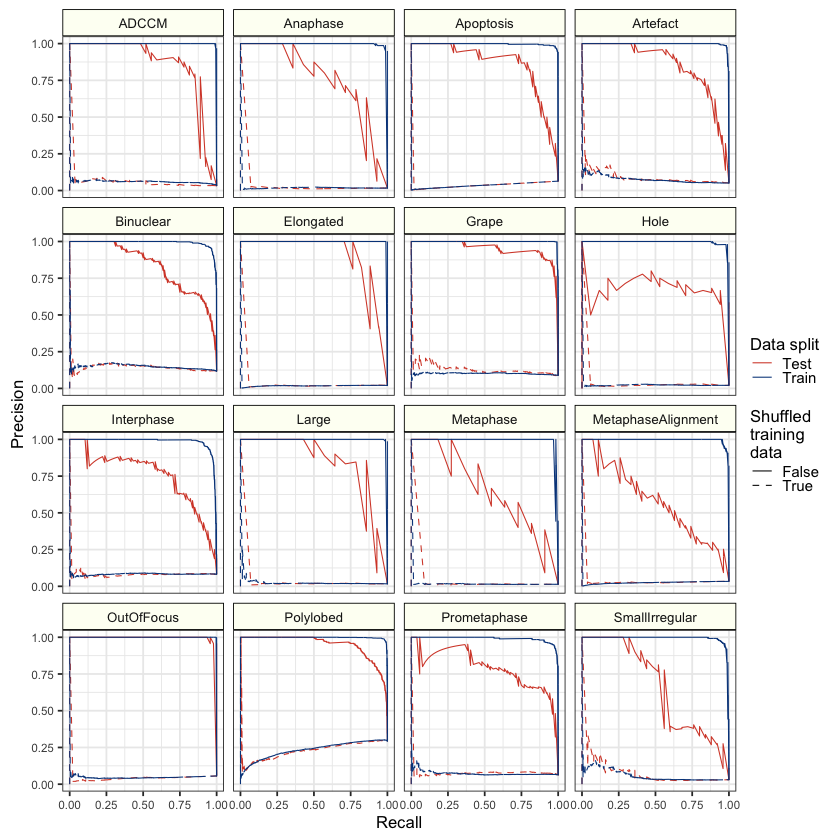

In [4]:
pr_curve_gg <- (
    ggplot(pr_df, aes(x = Recall, y = Precision))
    + geom_line(aes(color = data_split, linetype = shuffled), lwd = 0.3)
    + facet_wrap("~Phenotypic_Class")
    + theme_bw()
    + xlab("Recall")
    + ylab("Precision")
    + scale_color_manual(
        name = "Data split",
        labels = data_split_labels,
        values = data_split_colors
    )
    + scale_linetype_manual(
        name = "Shuffled\ntraining\ndata",
        labels = shuffled_labels,
        values = shuffled_linetypes
    )
    + guides(
        color = guide_legend(order = 1),
        linetype = guide_legend(order = 2),
    )
    + coord_fixed()
    + figure_theme
    # Decrease spacing in legend
    + theme(
        legend.spacing.y = unit(0.1, "cm"),
        legend.box.spacing = unit(0.1, "cm"),
        legend.key.size = unit(0.6, "lines"),
        legend.key.width = unit(1, "lines")
    )
)

ggsave(output_file, pr_curve_gg, height = 7.5, width = 8.5, dpi = 500)

pr_curve_gg